# エシカル消費に関する因子分析

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_fontja

In [3]:
df = pd.read_csv("dataset/FA_Toyo25_raw_data.csv", encoding="cp932")
df.head()

,id,アンケートID,案件名,回答者ID,完了フラグ,端末種類,性別,年齢,年代別,居住地,...,生産者の顔やメッセージが表示されている農産物だと、より安心できる。,産地や生産方法の情報が明確な農産物を選びたい,同じような商品なら、環境や地域への配慮よりも、まず価格の安さで選びたい。,環境や労働倫理に配慮した商品であっても、普通の商品より高いと、あまり買う気にならない。,環境や労働倫理に配慮した商品は、味や性能が劣るおそれがあるので、少し慎重になってしまう。,多少の不便があっても、環境や人、地域に配慮した選択をしたいと思う。,環境や倫理に配慮した商品を選ぶことは、自分の生き方や価値観を表現することだと思う。,地元産や環境にやさしい商品を、家族や友人にも勧めたいと思う。,あなたの年齢について教えてください。,あなたの性別について教えてください
0,39190175,790233,FA_Toyo25,39190175,1,SP,男性,26,２０代,千葉県,...,どちらともいえない,どちらともいえない,どちらともいえない,どちらともいえない,どちらともいえない,どちらともいえない,どちらともいえない,どちらともいえない,40代,男性
1,39190194,790233,FA_Toyo25,39190194,1,SP,男性,29,２０代,埼玉県,...,どちらともいえない,どちらともいえない,どちらともいえない,どちらともいえない,どちらともいえない,どちらともいえない,どちらともいえない,どちらともいえない,60代以上,女性
2,39190201,790233,FA_Toyo25,39190201,1,SP,男性,25,２０代,福岡県,...,まったくそう思わない,どちらともいえない,そう思わない,そう思わない,そう思う,どちらともいえない,どちらともいえない,どちらともいえない,40代,女性
3,39190230,790233,FA_Toyo25,39190230,1,SP,男性,27,２０代,埼玉県,...,とてもそう思う,とてもそう思う,そう思う,そう思う,そう思う,そう思う,そう思う,どちらともいえない,20代,男性
4,39190265,790233,FA_Toyo25,39190265,1,SP,男性,25,２０代,富山県,...,そう思わない,そう思わない,そう思わない,そう思わない,どちらともいえない,どちらともいえない,どちらともいえない,どちらともいえない,50代,男性


## データセットの形

In [4]:
df.shape

(1100, 34)

In [5]:
# 質問項目（職業の次から、「あなたの年齢〜」の直前まで）を抽出
cols = list(df.columns)
start_idx = cols.index("職業") + 1
end_idx = cols.index("あなたの年齢について教えてください。")
q_cols = cols[start_idx:end_idx]

print("質問数:", len(q_cols))
print("先頭3つ:", q_cols[:3])
print("末尾3つ:", q_cols[-3:])

質問数: 21
先頭3つ: ['できるだけ、地元でとれた野菜や果物を買いたいと思う。', '地元の農家や生産者を応援できる商品に、特に魅力を感じる。', 'スーパーや店では、自分の住んでいる地域で生産された農産物かどうかを気にして選ぶことが多い。']
末尾3つ: ['多少の不便があっても、環境や人、地域に配慮した選択をしたいと思う。', '環境や倫理に配慮した商品を選ぶことは、自分の生き方や価値観を表現することだと思う。', '地元産や環境にやさしい商品を、家族や友人にも勧めたいと思う。']


In [6]:
likert_map = {
    "まったくそう思わない": 1,
    "そう思わない": 2,
    "どちらともいえない": 3,
    "そう思う": 4,
    "とてもそう思う": 5,
}

X = df[q_cols].replace(likert_map).astype(float)
print("shape:", X.shape)
X

shape: (1100, 21)


/var/folders/7q/jqtp6ccs6mb82kp7896981yc0000gn/T/ipykernel_4437/1650180432.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = df[q_cols].replace(likert_map).astype(float)


,できるだけ、地元でとれた野菜や果物を買いたいと思う。,地元の農家や生産者を応援できる商品に、特に魅力を感じる。,スーパーや店では、自分の住んでいる地域で生産された農産物かどうかを気にして選ぶことが多い。,地元の直売所や朝市での買い物には、価格以上の価値があると思う。,飲食店を選ぶとき、地元食材を使っているかどうかを重視したい。,少し高くても、環境に配慮して生産された農産物を選びたい。,できるだけ、プラスチック包装が少ない商品を選びたい。,食品ロス（食べ残しや賞味期限切れ）を減らすよう、普段から意識している。,将来の世代のために、環境負荷の少ない商品を選ぶべきだと思う。,児童労働のない生産体制で作られた商品を、できるだけ選びたい。,...,働く人の人権や労働環境に配慮した企業の商品を優先的に買いたい。,農薬や化学肥料をできるだけ使っていない農産物を選びたい。,生産者の顔やメッセージが表示されている農産物だと、より安心できる。,産地や生産方法の情報が明確な農産物を選びたい,同じような商品なら、環境や地域への配慮よりも、まず価格の安さで選びたい。,環境や労働倫理に配慮した商品であっても、普通の商品より高いと、あまり買う気にならない。,環境や労働倫理に配慮した商品は、味や性能が劣るおそれがあるので、少し慎重になってしまう。,多少の不便があっても、環境や人、地域に配慮した選択をしたいと思う。,環境や倫理に配慮した商品を選ぶことは、自分の生き方や価値観を表現することだと思う。,地元産や環境にやさしい商品を、家族や友人にも勧めたいと思う。
0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,2.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,1.0,3.0,2.0,2.0,4.0,3.0,3.0,3.0
3,5.0,4.0,5.0,4.0,5.0,3.0,3.0,5.0,4.0,5.0,...,4.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0
4,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0
1096,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1097,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0,4.0,...,3.0,4.0,4.0,3.0,4.0,4.0,3.0,2.0,3.0,3.0
1098,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,...,3.0,5.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0


In [35]:
Xcorr = X.corr()

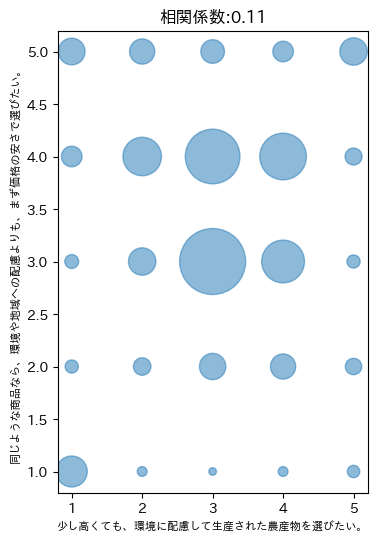

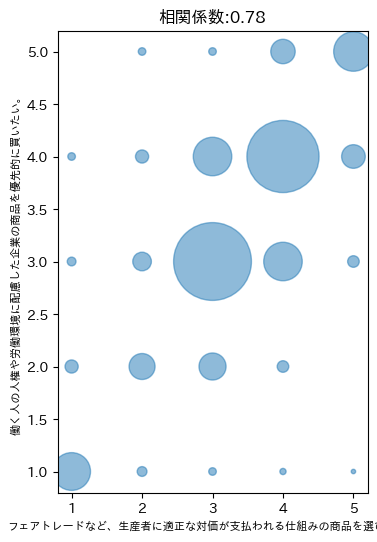

In [50]:
import seaborn as sns

qx = "少し高くても、環境に配慮して生産された農産物を選びたい。"
qx = "環境や労働倫理に配慮した商品であっても、普通の商品より高いと、あまり買う気にならない。"
qy = "同じような商品なら、環境や地域への配慮よりも、まず価格の安さで選びたい。"

def plot_correlation(qx, qy):
    x = X[qx]
    y = X[qy]
    pairs = pd.DataFrame({"x": x, "y": y})
    freq = pairs.value_counts().reset_index(name="count")
    corrcoef = Xcorr.loc[qx, qy]

    plt.figure(figsize=(4,6))
    plt.scatter(freq["x"], freq["y"], s=freq["count"] * 10, alpha=0.5)  # サイズ調整
    plt.title(f"相関係数:%.2f" % (corrcoef))
    plt.xlabel(qx, size=8)
    plt.ylabel(qy, size=8)
    plt.show()

plot_correlation("少し高くても、環境に配慮して生産された農産物を選びたい。","同じような商品なら、環境や地域への配慮よりも、まず価格の安さで選びたい。")
plot_correlation("フェアトレードなど、生産者に適正な対価が支払われる仕組みの商品を選びたい。","働く人の人権や労働環境に配慮した企業の商品を優先的に買いたい。")

## 因子分析

In [8]:
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

kmo_all, kmo_model = calculate_kmo(X)
chi2, p_value = calculate_bartlett_sphericity(X)

print("KMO(全体):", kmo_model)
print("Bartlett: chi2=", chi2, "p=", p_value)

KMO(全体): 0.9644133818529567
Bartlett: chi2= 18333.007664659814 p= 0.0


### 因子の数

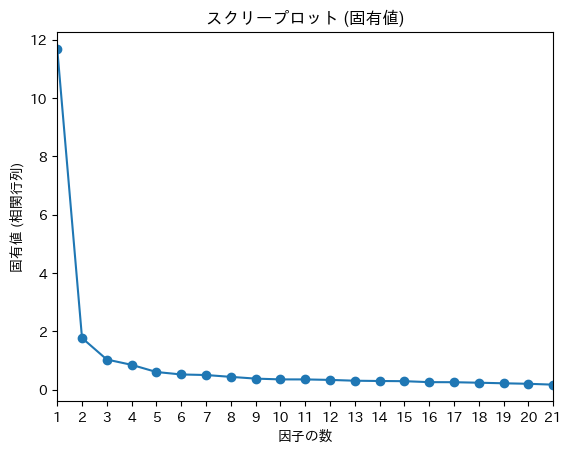

先頭の固有値: [11.69129554  1.76936097  1.02984822  0.84790899  0.6017365   0.51789459
  0.49854811  0.43522625]


In [47]:
import matplotlib.pyplot as plt

R = np.corrcoef(X.to_numpy(), rowvar=False)
eigvals = np.linalg.eigvalsh(R)[::-1]

plt.figure()
plt.plot(range(1, len(eigvals) + 1), eigvals, marker="o")
plt.xlabel("因子の数")
plt.ylabel("固有値 (相関行列)")
plt.xticks(range(22))
plt.xlim(1,21)
plt.title("スクリープロット (固有値)")
plt.show()

print("先頭の固有値:", eigvals[:8])

In [60]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=3, rotation="varimax", method="principal")
fa.fit(X)

scores = fa.fit_transform(X)

loadings = pd.DataFrame(fa.loadings_, index=q_cols, columns=["F1", "F2", "F3"])

# 見やすく：各項目が一番強く載る因子を付ける
abs_max = loadings.abs().max(axis=1)
top_factor = loadings.abs().idxmax(axis=1)

result = loadings.copy()
result["max_abs_loading"] = abs_max
result["top_factor"] = top_factor

# 上位（強く載る項目）から表示
display(result.sort_values("max_abs_loading", ascending=False).head(20).round(3))

/Volumes/m2SSD/Users/Shared/miniforge3/envs/fa/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Volumes/m2SSD/Users/Shared/miniforge3/envs/fa/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Volumes/m2SSD/Users/Shared/miniforge3/envs/fa/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,F1,F2,F3,max_abs_loading,top_factor
環境や労働倫理に配慮した商品であっても、普通の商品より高いと、あまり買う気にならない。,0.267,0.850,0.002,0.850,F2
飲食店を選ぶとき、地元食材を使っているかどうかを重視したい。,0.266,0.065,0.834,0.834,F3
同じような商品なら、環境や地域への配慮よりも、まず価格の安さで選びたい。,0.287,0.812,-0.006,0.812,F2
スーパーや店では、自分の住んでいる地域で生産された農産物かどうかを気にして選ぶことが多い。,0.285,0.065,0.811,0.811,F3
食品ロス（食べ残しや賞味期限切れ）を減らすよう、普段から意識している。,0.757,0.335,0.114,0.757,F1
将来の世代のために、環境負荷の少ない商品を選ぶべきだと思う。,0.746,0.184,0.362,0.746,F1
児童労働のない生産体制で作られた商品を、できるだけ選びたい。,0.746,0.162,0.338,0.746,F1
働く人の人権や労働環境に配慮した企業の商品を優先的に買いたい。,0.741,0.177,0.378,0.741,F1
フェアトレードなど、生産者に適正な対価が支払われる仕組みの商品を選びたい。,0.740,0.144,0.387,0.740,F1
産地や生産方法の情報が明確な農産物を選びたい,0.692,0.245,0.394,0.692,F1


In [54]:
result[result["top_factor"] == "F1"].sort_values('F1', ascending=False).reset_index()[["index"]]

,index
0,食品ロス（食べ残しや賞味期限切れ）を減らすよう、普段から意識している。
1,将来の世代のために、環境負荷の少ない商品を選ぶべきだと思う。
2,児童労働のない生産体制で作られた商品を、できるだけ選びたい。
3,働く人の人権や労働環境に配慮した企業の商品を優先的に買いたい。
4,フェアトレードなど、生産者に適正な対価が支払われる仕組みの商品を選びたい。
5,産地や生産方法の情報が明確な農産物を選びたい
6,できるだけ、プラスチック包装が少ない商品を選びたい。
7,農薬や化学肥料をできるだけ使っていない農産物を選びたい。
8,生産者の顔やメッセージが表示されている農産物だと、より安心できる。
9,地元の農家や生産者を応援できる商品に、特に魅力を感じる。


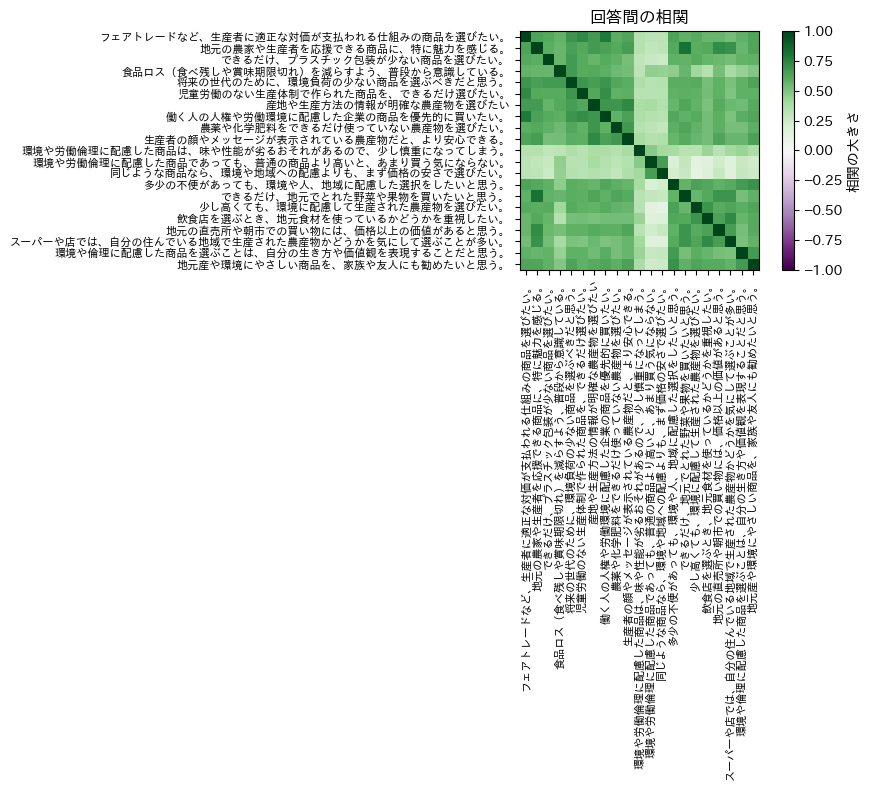

In [12]:
# X: 数値化済みの質問データ（前ステップと同じ）
corr = X.corr()

# factor-analyzer の結果（あなたが示した表）
loadings = result[["F1", "F2", "F3"]]

# 各設問が最も強く載る因子
order = loadings.abs().idxmax(axis=1)

# 因子 → 設問順に並べ替え
ordered_items = (
    order.reset_index()
    .rename(columns={"index": "item", 0: "factor"})
    .sort_values("factor")["item"]
)

corr_ordered = corr.loc[ordered_items, ordered_items]

plt.figure(figsize=(10, 8))
plt.imshow(corr_ordered, vmin=-1, vmax=1, cmap="PRGn")
plt.colorbar(label="相関の大きさ")

plt.xticks(range(len(ordered_items)), ordered_items, rotation=90, fontsize=8)
plt.yticks(range(len(ordered_items)), ordered_items, fontsize=8)

plt.title("回答間の相関")
plt.tight_layout()
plt.show()

In [63]:
scores = pd.DataFrame(scores, columns=["エシカル意識","価格/品質意識","地元産意識と実践"])

In [64]:
scores

,エシカル意識,価格/品質意識,地元産意識と実践
0,-0.673395,-0.330990,0.310719
1,-0.673395,-0.330990,0.310719
2,-1.263284,-0.872297,1.144643
3,0.535419,0.713187,1.047011
4,-1.964555,-0.852118,0.486114
...,...,...,...
1095,-2.957638,-0.463992,-0.111110
1096,-1.852579,-2.195318,-1.390146
1097,0.236917,0.691824,-0.813126
1098,0.026281,0.134252,0.073218


In [58]:
result[["F1","F2","F3"]].head()

,F1,F2,F3
できるだけ、地元でとれた野菜や果物を買いたいと思う。,0.542755,0.133409,0.579237
地元の農家や生産者を応援できる商品に、特に魅力を感じる。,0.586146,0.144799,0.584997
スーパーや店では、自分の住んでいる地域で生産された農産物かどうかを気にして選ぶことが多い。,0.284993,0.065184,0.811352
地元の直売所や朝市での買い物には、価格以上の価値があると思う。,0.502578,0.105345,0.618623
飲食店を選ぶとき、地元食材を使っているかどうかを重視したい。,0.266471,0.064543,0.834498


In [59]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

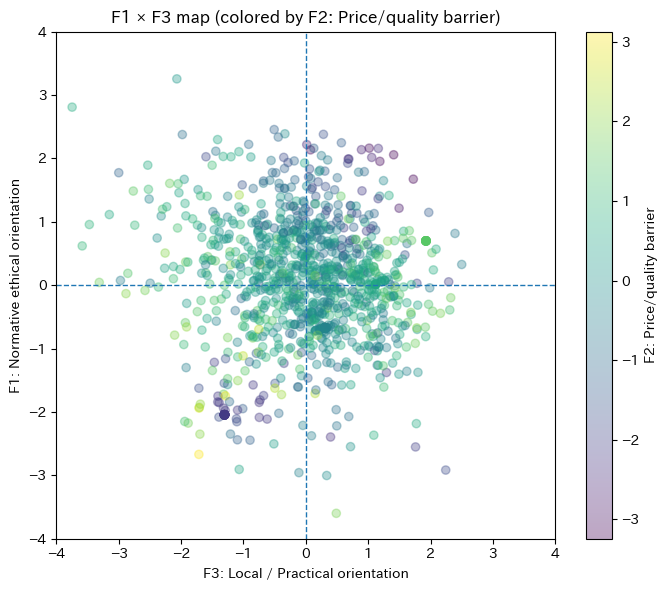

In [ ]:
# F1×F3 マップ（色＝F2：価格・品質意識）
import pandas as pd
import matplotlib.pyplot as plt

df = scores.copy()
# 列名（今回の出力に合わせて固定）
F1 = "エシカル意識"       # 規範的エシカル
F2 = "価格/品質意識"      # 価格・品質のブレーキ
F3 = "地元産意識と実践"   # 地元・実践

x = df[F3]
y = df[F1]
c = df[F2]

plt.figure(figsize=(7, 6))
sc = plt.scatter(x, y, c=c, alpha=0.35)

# 4象限の基準線（因子得点は平均0に中心化されている想定）
plt.axhline(0, linestyle="--", linewidth=1)
plt.axvline(0, linestyle="--", linewidth=1)

plt.xlabel("F3: 地元産意識と実践")
plt.ylabel("F1: エシカル意識")
plt.title("F1 × F3 map (colored by F2: Price/quality barrier)")
plt.colorbar(sc, label="F2: Price/quality barrier")

# もし朝霞市の回答が含まれている場合は強調表示（任意）
if "居住地" in df.columns:
    asaka = df[df["居住地"].astype(str).str.contains("朝霞", na=False)]
    if len(asaka) > 0:
        plt.scatter(
            asaka[F3], asaka[F1],
            c=asaka[F2],
            edgecolor="black",
            s=90,
            alpha=0.9
        )
        plt.legend(["Asaka (if present)"], loc="best")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.tight_layout()
plt.show()
